<a href="https://colab.research.google.com/github/rafay79/AI-Image-Using-Web/blob/main/Heart_Attack_Analysis_%26_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#In this project,**

 we leverage a range of powerful libraries and tools to analyze and predict heart attack risks. We begin by importing essential libraries such as Pandas and NumPy for data manipulation and numerical operations, and Seaborn and Matplotlib for data visualization. The core machine learning libraries from Scikit-learn are utilized for model building and evaluation, including classifiers like Support Vector Machines (SVC), K-Nearest Neighbors (KNN), Random Forest, Naive Bayes, Logistic Regression, Multi-layer Perceptron (MLP), and Decision Trees. Data preprocessing and performance metrics such as accuracy, confusion matrix, mean squared error, and ROC curves are also integrated to ensure robust model evaluation. To facilitate experimentation, the script includes Google Colab integration for easy access to data stored in Google Drive. Additionally, there are placeholders for potential integration with deep learning frameworks like Keras and TensorFlow, although these sections are currently commented out. The time module is used to track the execution duration of the script, ensuring efficient processing. Overall, this comprehensive setup allows for effective analysis and prediction of heart attack risks using various machine learning approaches.

In [3]:
import pandas as pd
import numpy as np
import numbers
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Activation
#from tensorflow.keras.callbacks import EarlyStopping
#from keras.utils.vis_utils import plot_model
import seaborn as sns
sns.set()
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
import time
start = time.time()
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics
#!pip install Float

from google.colab import drive

drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:


df = pd.read_csv('/content/drive/MyDrive/DataSet/heart.csv')

df.head()




,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


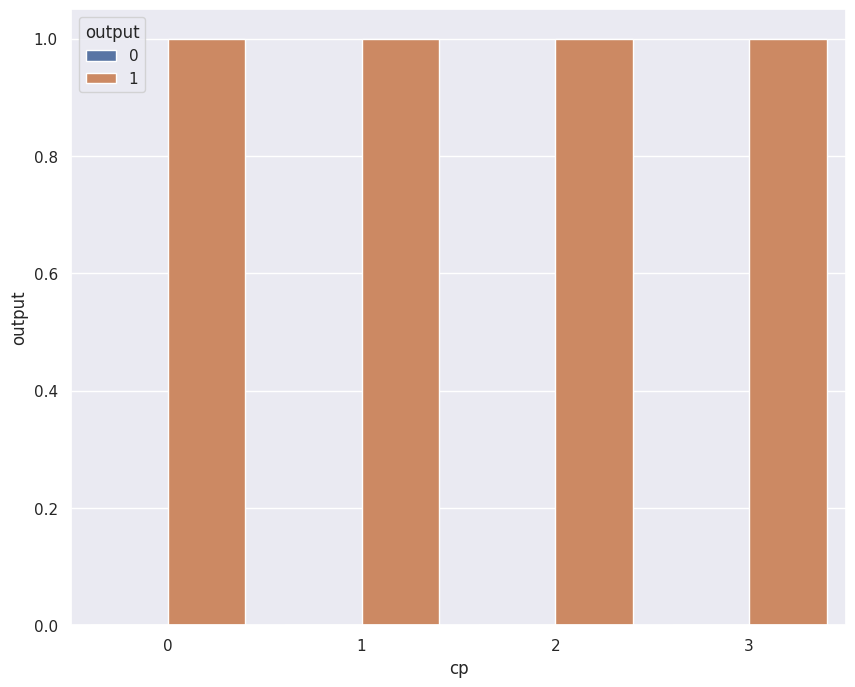

In [7]:
plt.figure(figsize=(10,8))
sns.barplot(x='cp',y='output',hue='output',data=df)
plt.show()

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DataSet/heart.csv')

df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:

if 'Grade' in df.columns:
    f, ax = plt.subplots(2, figsize=(18, 8))

    # Pie chart
    df['Grade'].value_counts().plot.pie(explode=[0, 0, 0.1], ax=ax[0], autopct='%.2f%%', shadow=True)
    ax[0].set_title('The Grade of the Milk Pie Chart')
    ax[0].set_ylabel(' ')

    # Count plot
    sns.countplot(x='Grade', data=df, ax=ax[1])
    ax[1].set_title('The Quantity of Low, Medium, and High Milk Quality')

    plt.show()
else:
    print("The 'Grade' column does not exist in the DataFrame.")

The 'Grade' column does not exist in the DataFrame.


In [11]:
X = df.iloc[:,0:7].values
y = df.iloc[:, 8:].values

In [12]:
y

array([[0. , 2.3, 0. , 0. , 1. , 1. ],
       [0. , 3.5, 0. , 0. , 2. , 1. ],
       [0. , 1.4, 2. , 0. , 2. , 1. ],
       ...,
       [0. , 3.4, 1. , 2. , 3. , 0. ],
       [1. , 1.2, 1. , 1. , 3. , 0. ],
       [0. , 0. , 1. , 1. , 2. , 0. ]])

In [13]:
X

array([[ 63,   1,   3, ..., 233,   1,   0],
       [ 37,   1,   2, ..., 250,   0,   1],
       [ 41,   0,   1, ..., 204,   0,   0],
       ...,
       [ 68,   1,   0, ..., 193,   1,   1],
       [ 57,   1,   0, ..., 131,   0,   1],
       [ 57,   0,   1, ..., 236,   0,   0]])

In [14]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

Starting KNN Classifier
Training time: 0.0044934749603271484
Test time: 0.009694814682006836
Training accuracy: 1.0
Test accuracy: 1.0
RMSE: 0.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


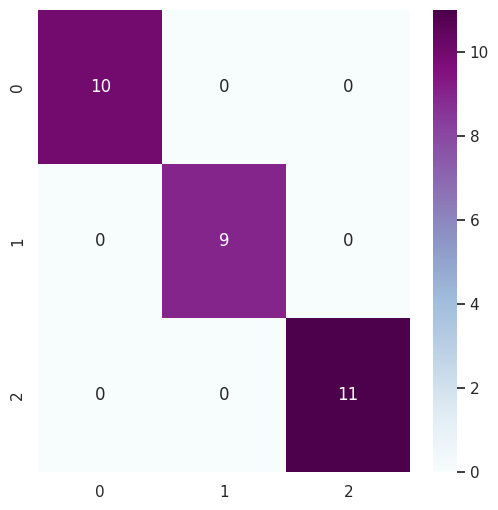

In [15]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Example data loading, replace with actual data
# df = pd.read_csv('your_data.csv')
# X = df.drop('target_column', axis=1)
# y = df['target_column']

# For the purpose of demonstration, let's create a sample dataset
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Convert categorical data if necessary
# X = pd.get_dummies(X)  # Uncomment if there are categorical columns in X

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the KNN classifier
print("Starting KNN Classifier")
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier to the training data
start = time.time()
knn.fit(X_train, y_train)
end = time.time()

# Calculate training time
knn_diff = end - start
print("Training time: " + str(knn_diff))

# Predict the class labels using the testing data
starttest = time.time()
y_pred = knn.predict(X_test)
endtest = time.time()

# Calculate testing time
knn_difftest = endtest - starttest
print("Test time: " + str(knn_difftest))

# Calculate training accuracy
train_accuracy = knn.score(X_train, y_train)
print("Training accuracy: " + str(train_accuracy))

# Calculate test accuracy
test_accuracy = knn.score(X_test, y_test)
print("Test accuracy: " + str(test_accuracy))

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE: " + str(rmse))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(accuracy))

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision: " + str(precision))

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall: " + str(recall))

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score: " + str(f1))

# Confusion matrix
matrixdt = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(matrixdt, annot=True, fmt='d', cmap="BuPu", ax=ax)
print(matrixdt)
plt.show()


Starting Decision tree
Training time: 0.003322601318359375
Test time: 0.0040547847747802734
Train accuracy: 1.0
Test accuracy: 1.0
RMSE 0.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


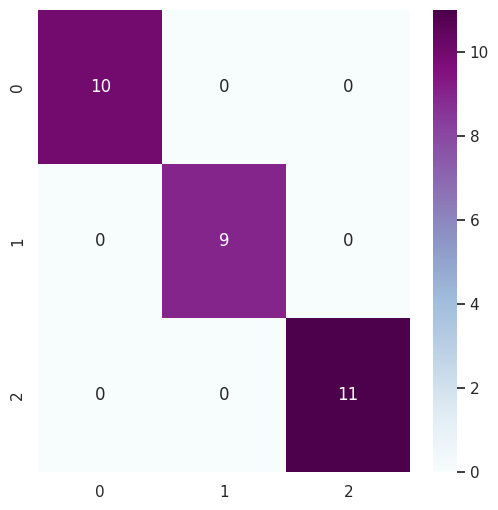

In [16]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

print("Starting Decision tree")
start = time.time()
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
end = time.time()
dt_diff = end - start
print("Training time: " + str(dt_diff))

starttest = time.time()
y_pred_dt = clf.predict(X_test)
train_pred_dt = clf.predict(X_train)
y_pred_dt_roc = clf.predict_proba(X_test)
endtest = time.time()
dt_difftest = endtest - starttest
print("Test time: " + str(dt_difftest))

# Calculate accuracies
train_accuracy = accuracy_score(y_train, train_pred_dt)
test_accuracy = accuracy_score(y_test, y_pred_dt)
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

# Calculate RMSE
error = sqrt(mean_squared_error(y_test, y_pred_dt))
print("RMSE", error)

# Calculate F1 score, precision, and recall
f1 = f1_score(y_test, y_pred_dt, average='weighted')
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
print("Accuracy: " + str(test_accuracy))
print("Precision:", precision)
print("Recall:", recall)
print("F1 score: " + str(f1))

# Confusion matrix
matrixdt = confusion_matrix(y_test, y_pred_dt)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(matrixdt, annot=True, fmt='d', cmap="BuPu", ax=ax)
print(matrixdt)
plt.show()


Starting Random forest
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
bu

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


Test time: 0.02417159080505371
Train accuracy: 1.0
Test accuracy: 1.0
RMSE 0.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


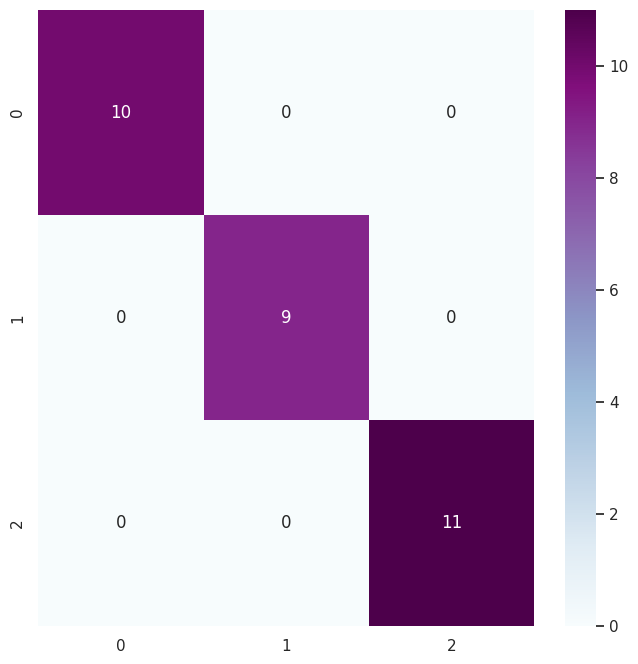

In [17]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

print("Starting Random forest")
seed = 7

# Start time for training
start = time.time()

# Initialize and train the RandomForestClassifier
classifier = RandomForestClassifier(verbose=2, random_state=seed)
classifier.fit(X_train, y_train)

# End time for training
end = time.time()
rf_diff = end - start
print("Training time: " + str(rf_diff))

# Start time for testing
starttest = time.time()

# Predict on the test set
y_pred_random = classifier.predict(X_test)

# Predict on the training set for training accuracy
train_pred_rf = classifier.predict(X_train)

# End time for testing
endtest = time.time()
rf_difftest = endtest - starttest
print("Test time: " + str(rf_difftest))

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_pred_rf)
test_accuracy = accuracy_score(y_test, y_pred_random)
print("Train accuracy: " + str(train_accuracy))
print("Test accuracy: " + str(test_accuracy))

# Calculate RMSE
z = mean_squared_error(y_test, y_pred_random)
error = sqrt(mean_squared_error(y_test, y_pred_random))
print("RMSE", error)

# Calculate accuracy, precision and recall
precision = precision_score(y_test, y_pred_random, average='weighted')
recall = recall_score(y_test, y_pred_random, average='weighted')
print("Accuracy: " + str(test_accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))

# Calculate F1 score
f1 = f1_score(y_test, y_pred_random, average='weighted')
print("F1 score: " + str(f1))

# Confusion matrix
matrixrf = confusion_matrix(y_test, y_pred_random)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(matrixrf, annot=True, fmt='d', cmap="BuPu", ax=ax)
print(matrixrf)


Starting Naive Bayes
Training time: 0.004010677337646484
Test time: 0.0035169124603271484
Train accuracy: 0.95
Test accuracy: 1.0
RMSE 0.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score:1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


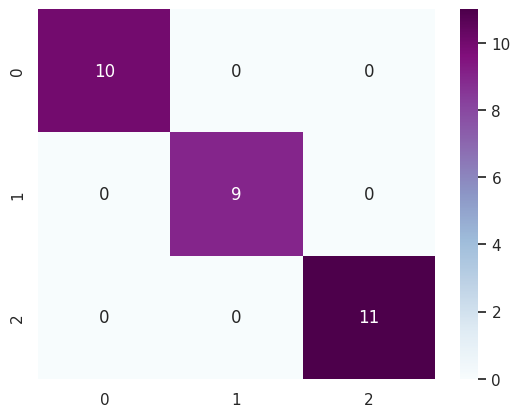

In [18]:
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from math import sqrt
import seaborn as sns

print("Starting Naive Bayes")
start = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
end = time.time()
diff = end - start
print("Training time: " + str(diff))

starttest = time.time()
y_pred_nb = gnb.predict(X_test)
endtest = time.time()
difftest = endtest - starttest
print("Test time: " + str(difftest))

# Calculate train accuracy
y_train_pred = gnb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train accuracy: " + str(train_accuracy))

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_nb)
print("Test accuracy: " + str(test_accuracy))

# Calculate RMSE
z = mean_squared_error(y_test, y_pred_nb)
error = sqrt(z)
print("RMSE", error)

# Calculate accuracy, precision and recall
precision = precision_score(y_test, y_pred_nb, average='weighted')
recall = recall_score(y_test, y_pred_nb, average='weighted')
print("Accuracy: " + str(test_accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))

# Calculate F1 score and confusion matrix
f1 = f1_score(y_test, y_pred_nb, average='weighted')
print("F1 score:" + str(f1))

matrixnv = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(matrixnv, annot=True, fmt='d', cmap="BuPu")
print(matrixnv)


Accuracy = 100.0 %
RMSE 0.0
SVM, accuracy: 1.0 F1 score:1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


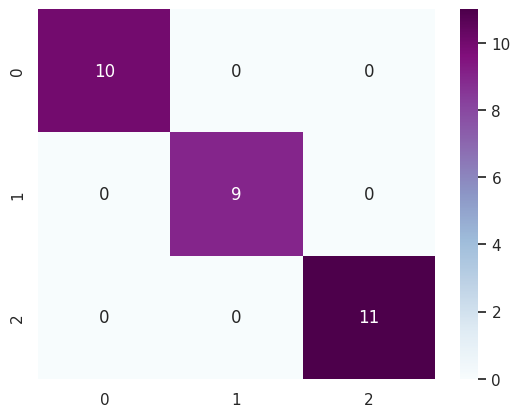

In [19]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred_svm = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f"Accuracy = {accuracy*100} %")

z = mean_squared_error(y_test, y_pred)
error = sqrt(mean_squared_error(y_test, y_pred_svm))
print("RMSE", error)



print("SVM, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_svm)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_svm,average='weighted')))
matrixnv = confusion_matrix(y_test,y_pred_svm)
sns.heatmap(matrixnv,annot=True,fmt='d',cmap="BuPu")
print(matrixnv)

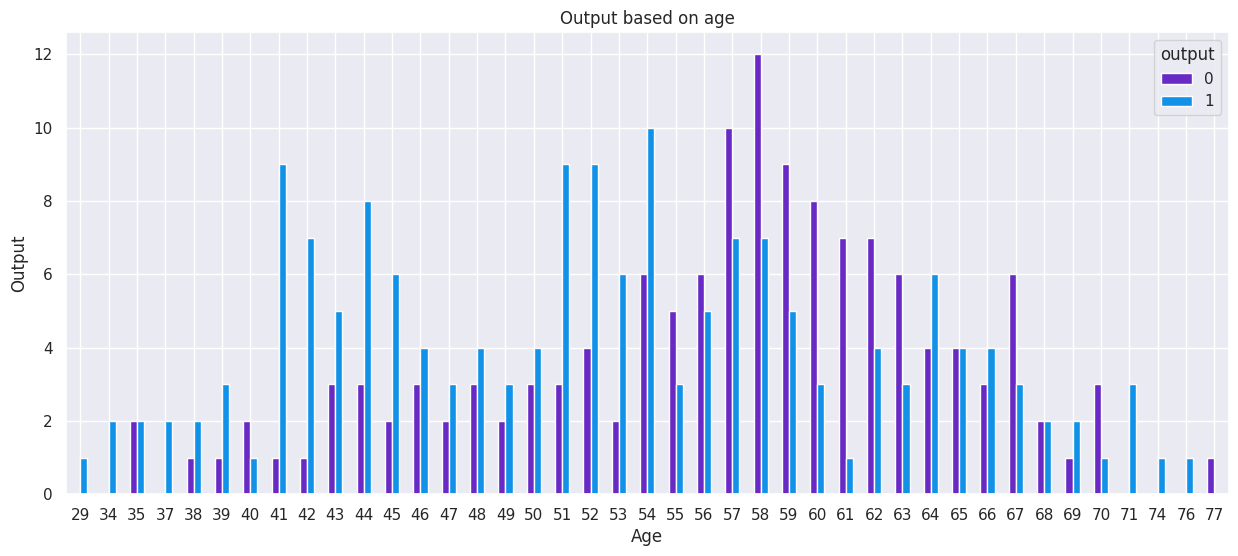

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DataSet/heart.csv')
pd.crosstab(df.age,df.output).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Output based on age')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Output')
plt.show()

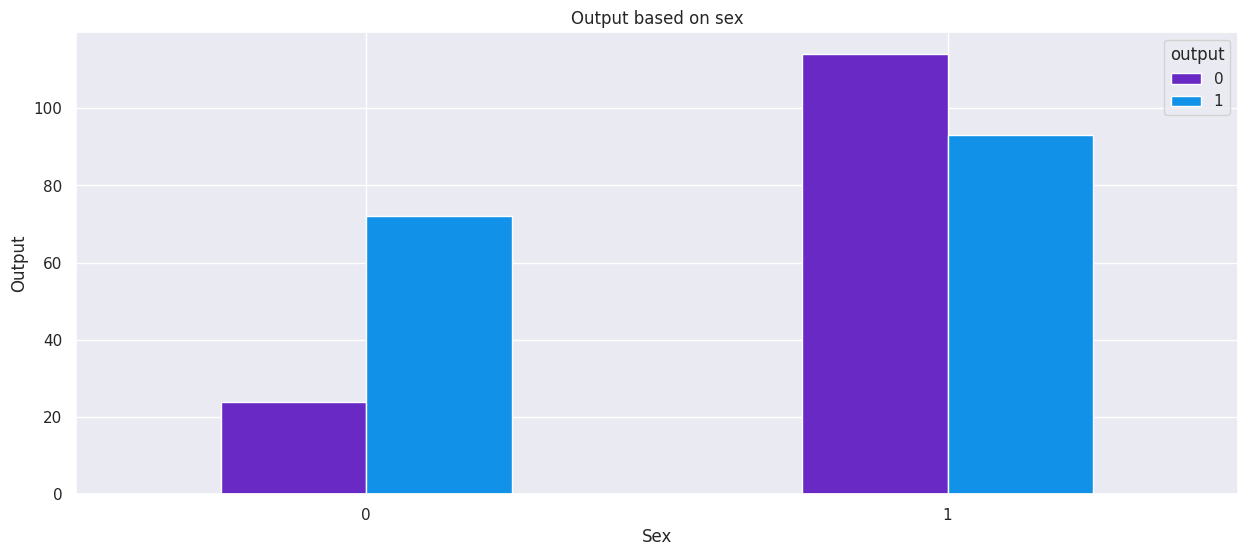

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DataSet/heart.csv')
pd.crosstab(df.sex,df.output).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Output based on sex')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.ylabel('Output')
plt.show()

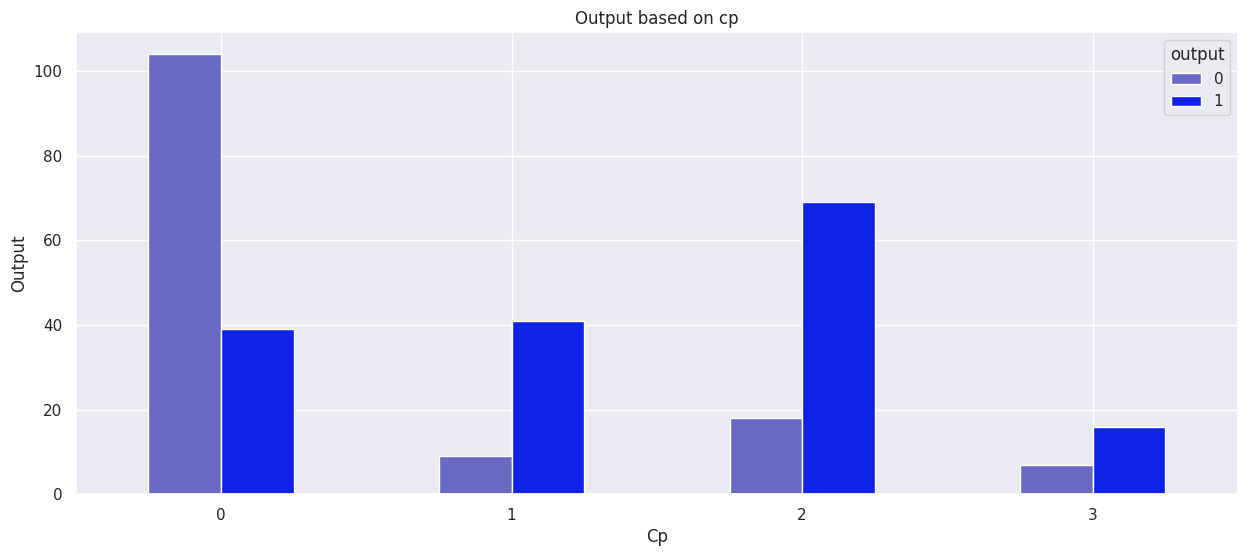

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DataSet/heart.csv')
pd.crosstab(df.cp,df.output).plot(kind="bar",figsize=(15,6),color=['#6969c4','#1122e8'])
plt.title('Output based on cp')
plt.xlabel('Cp')
plt.xticks(rotation=0)
plt.ylabel('Output')
plt.show()

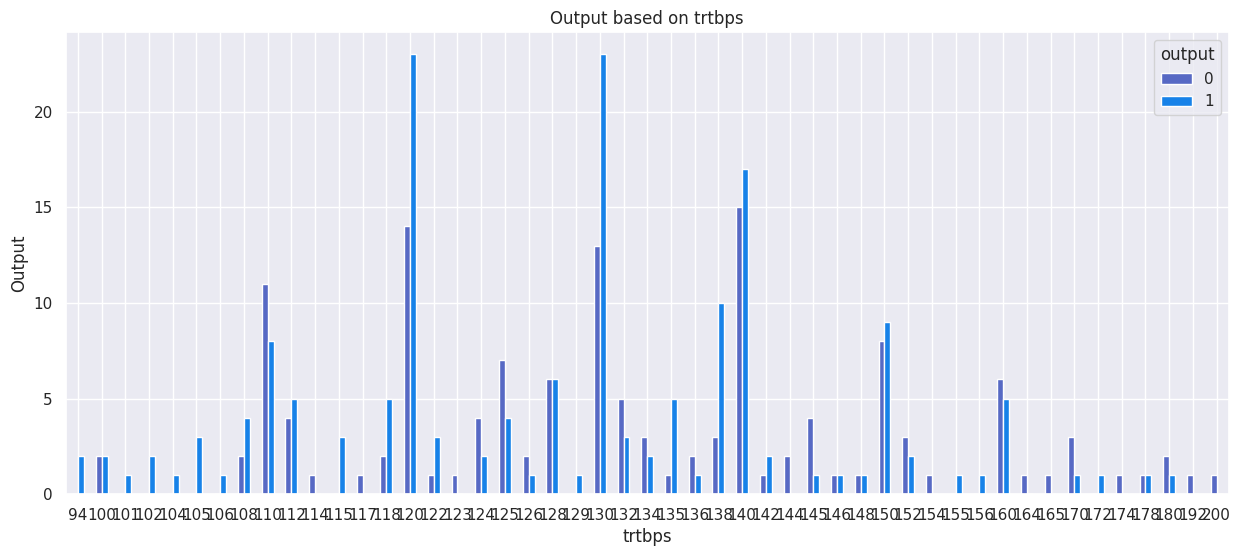

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DataSet/heart.csv')
pd.crosstab(df.trtbps,df.output).plot(kind="bar",figsize=(15,6),color=['#5769c4','#1782e8'])
plt.title('Output based on trtbps')
plt.xlabel('trtbps')
plt.xticks(rotation=0)
plt.ylabel('Output')
plt.show()

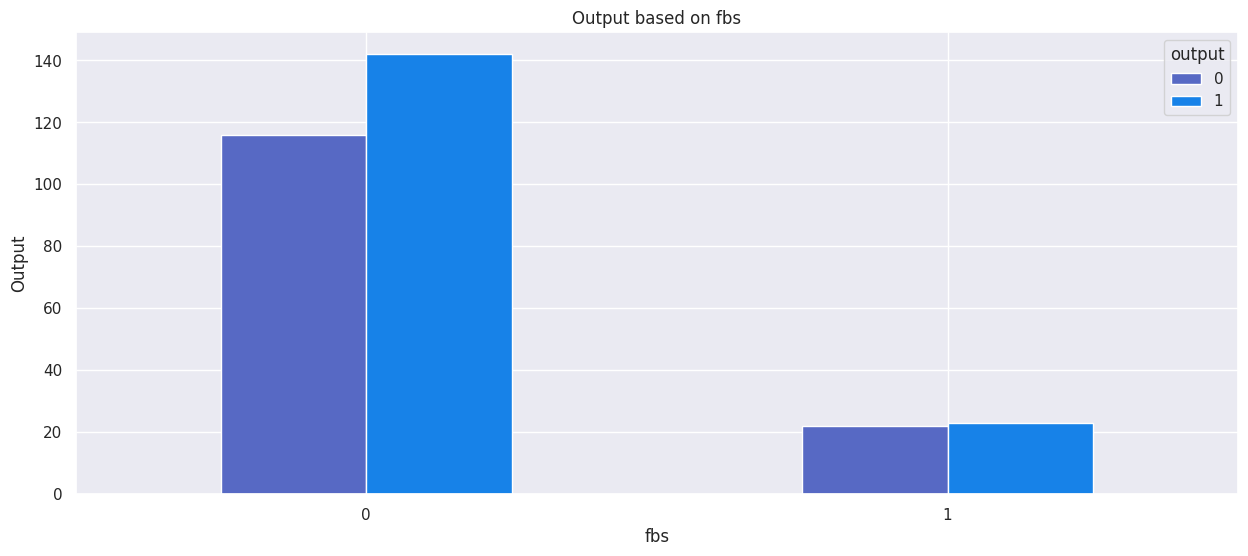

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DataSet/heart.csv')
pd.crosstab(df.fbs,df.output).plot(kind="bar",figsize=(15,6),color=['#5769c4','#1782e8'])
plt.title('Output based on fbs')
plt.xlabel('fbs')
plt.xticks(rotation=0)
plt.ylabel('Output')
plt.show()

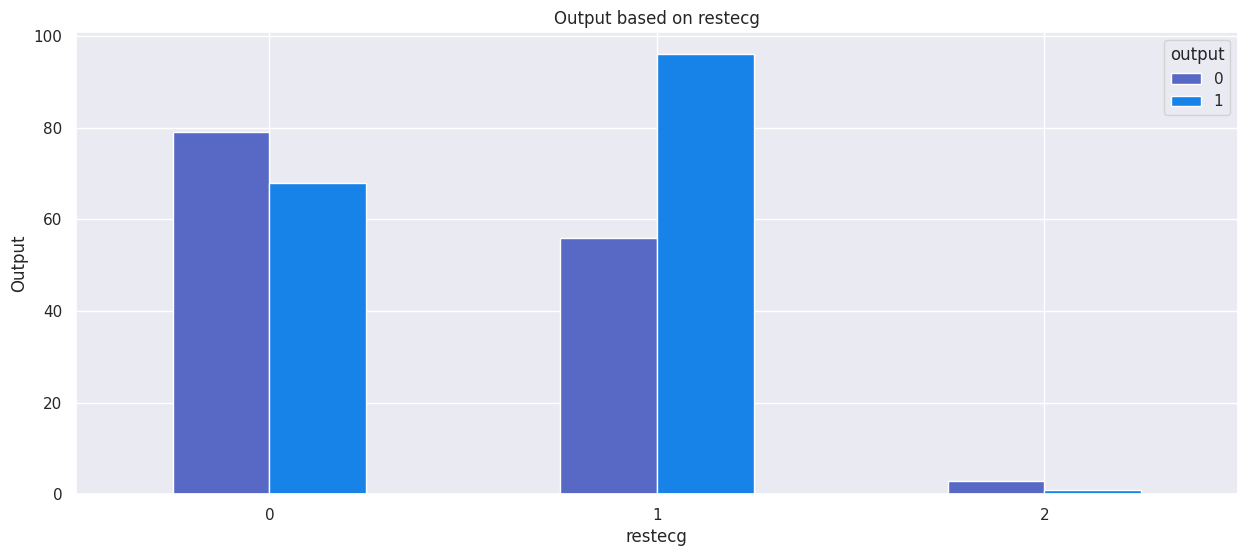

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DataSet/heart.csv')
pd.crosstab(df.restecg,df.output).plot(kind="bar",figsize=(15,6),color=['#5769c4','#1782e8'])
plt.title('Output based on restecg')
plt.xlabel('restecg')
plt.xticks(rotation=0)
plt.ylabel('Output')
plt.show()

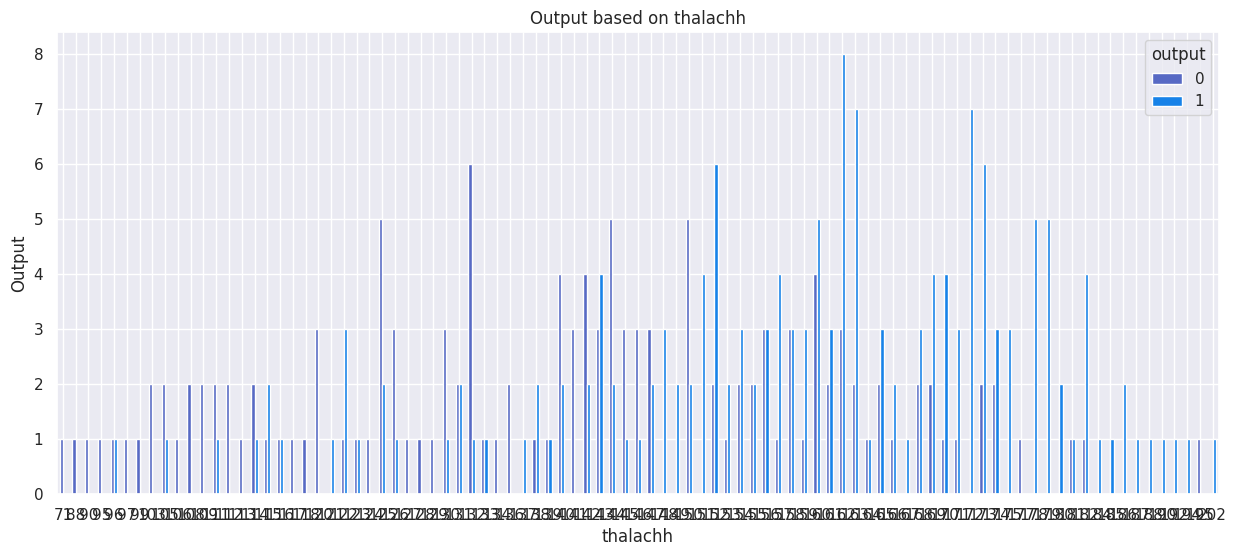

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DataSet/heart.csv')
pd.crosstab(df.thalachh,df.output).plot(kind="bar",figsize=(15,6),color=['#5769c4','#1782e8'])
plt.title('Output based on thalachh')
plt.xlabel('thalachh')
plt.xticks(rotation=0)
plt.ylabel('Output')
plt.show()

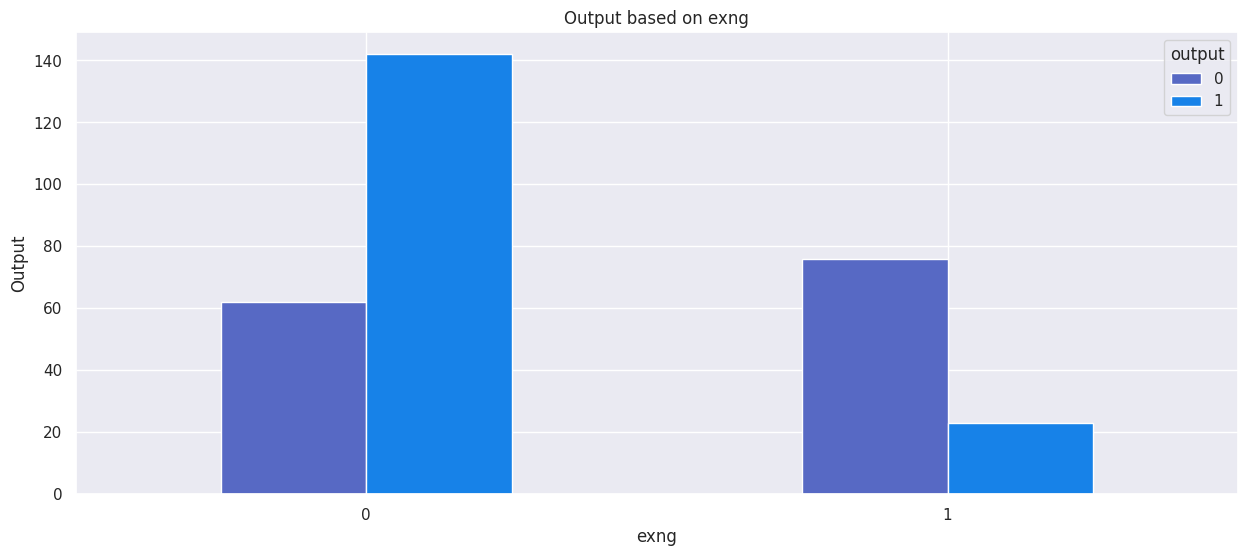

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DataSet/heart.csv')
pd.crosstab(df.exng,df.output).plot(kind="bar",figsize=(15,6),color=['#5769c4','#1782e8'])
plt.title('Output based on exng')
plt.xlabel('exng')
plt.xticks(rotation=0)
plt.ylabel('Output')
plt.show()

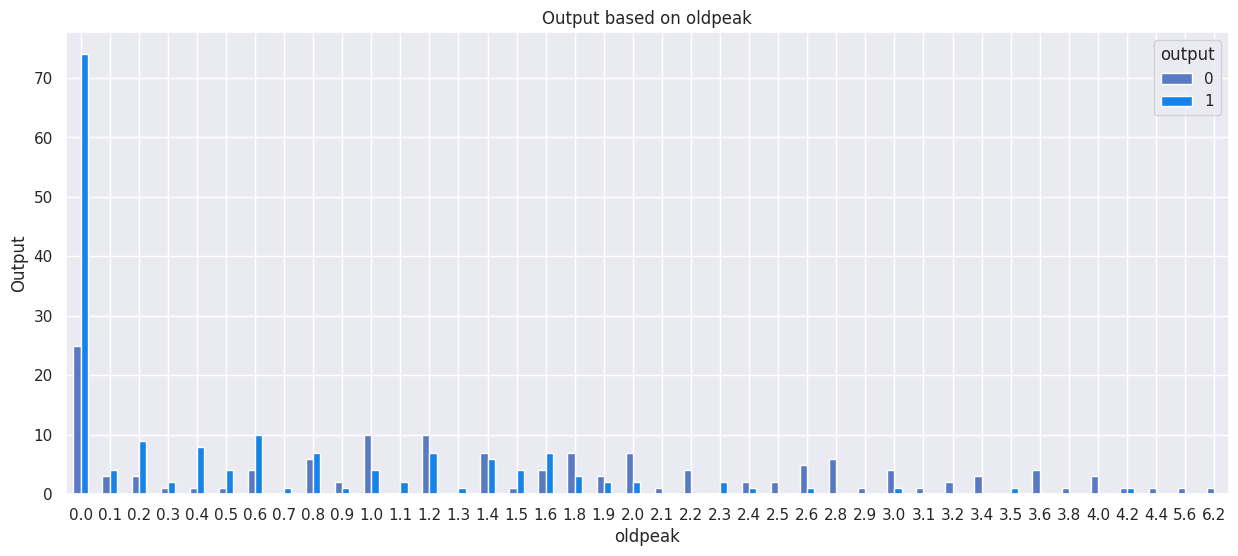

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DataSet/heart.csv')
pd.crosstab(df.oldpeak,df.output).plot(kind="bar",figsize=(15,6),color=['#5879c4','#1782e8'])
plt.title('Output based on oldpeak')
plt.xlabel('oldpeak')
plt.xticks(rotation=0)
plt.ylabel('Output')
plt.show()

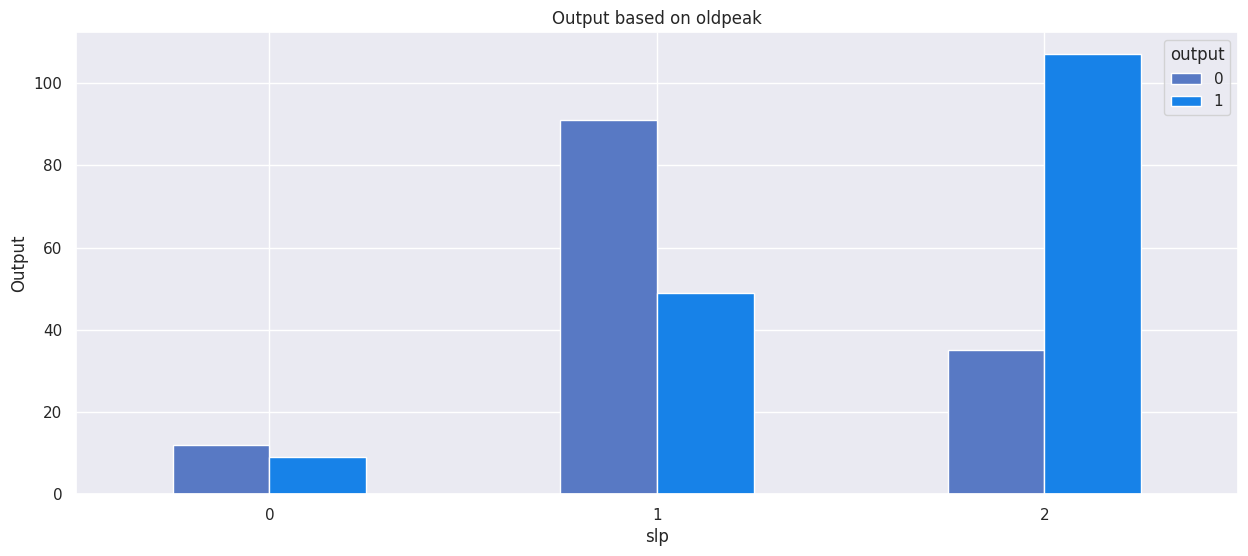

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DataSet/heart.csv')
pd.crosstab(df.slp,df.output).plot(kind="bar",figsize=(15,6),color=['#5879c4','#1782e8'])
plt.title('Output based on oldpeak')
plt.xlabel('slp')
plt.xticks(rotation=0)
plt.ylabel('Output')
plt.show()

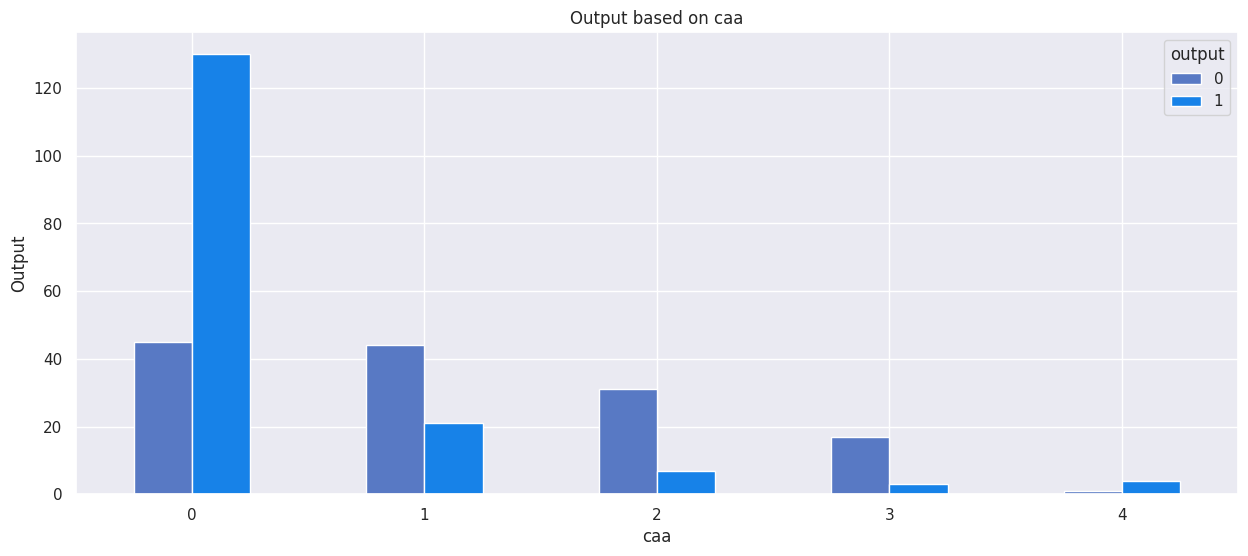

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DataSet/heart.csv')
pd.crosstab(df.caa,df.output).plot(kind="bar",figsize=(15,6),color=['#5879c4','#1782e8'])
plt.title('Output based on caa')
plt.xlabel('caa')
plt.xticks(rotation=0)
plt.ylabel('Output')
plt.show()

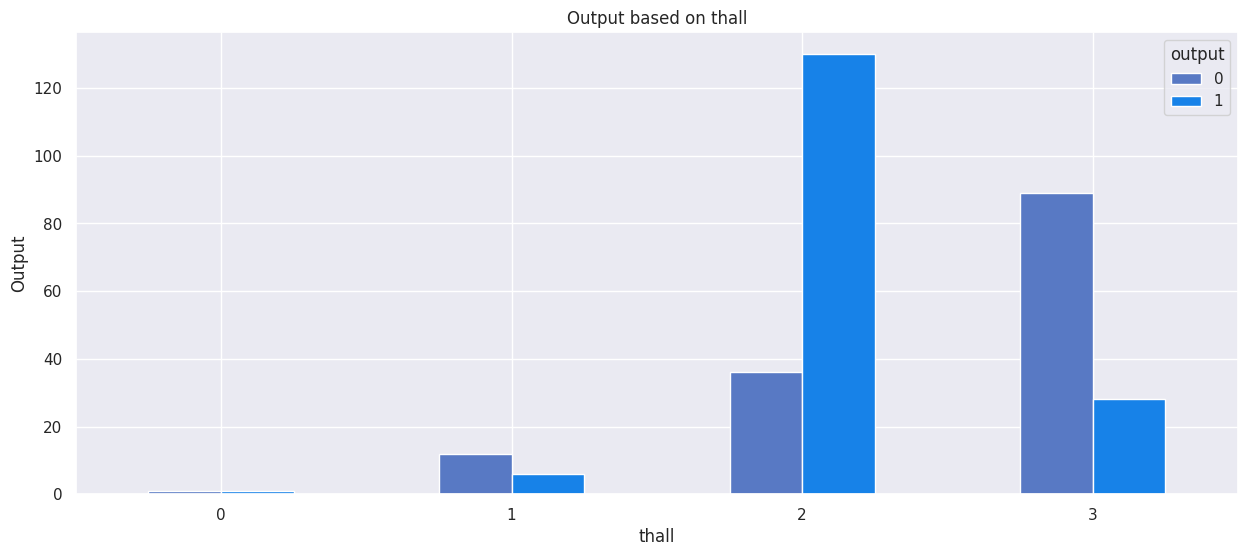

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DataSet/heart.csv')
pd.crosstab(df.thall,df.output).plot(kind="bar",figsize=(15,6),color=['#5879c4','#1782e8'])
plt.title('Output based on thall')
plt.xlabel('thall')
plt.xticks(rotation=0)
plt.ylabel('Output')
plt.show()

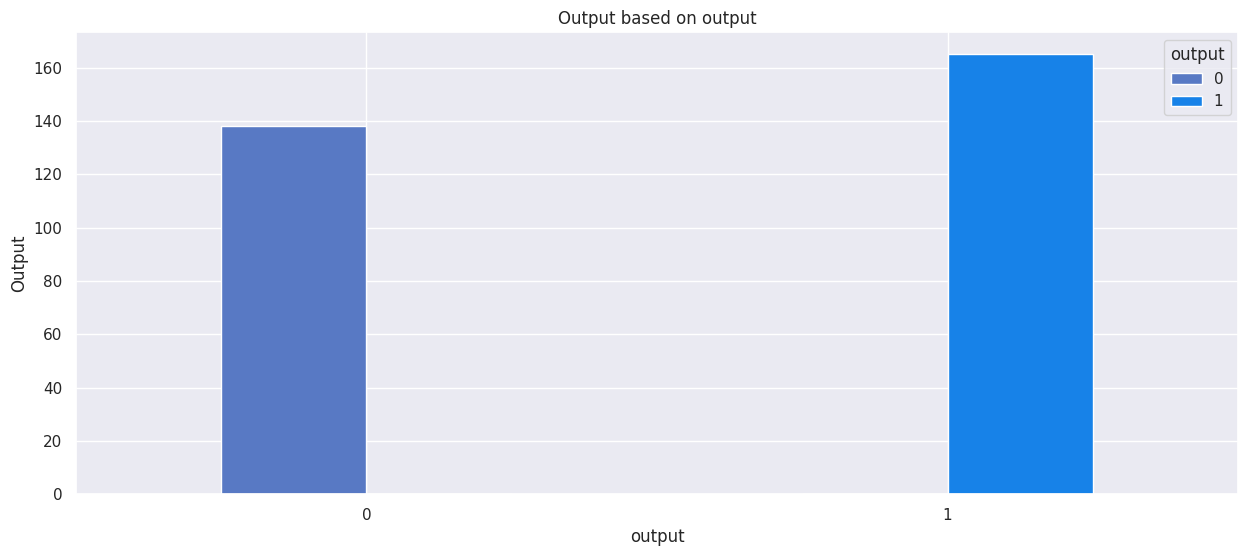

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DataSet/heart.csv')
pd.crosstab(df.output,df.output).plot(kind="bar",figsize=(15,6),color=['#5879c4','#1782e8'])
plt.title('Output based on output')
plt.xlabel('output')
plt.xticks(rotation=0)
plt.ylabel('Output')
plt.show()